<a href="https://www.kaggle.com/code/reihanenamdari/top-10-countries-listed-by-various-death-causes?scriptVersionId=113413850" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## <b><span style='color:#4a8fdd'>|</span> INTRODUCTION</b>

<div style="border-radius:10px;
            border : black solid;
            background-color: #C2F2F9;
            font-size:110%;
            text-align: left">

<h3 style='; border:0; border-radius: 15px; font-weight: bold; color:black'><center>The Kernel and datasets</center></h3>  
  
In this Notebook I'm going to show the "Top 10 Countries" in various death cause categories. The goall is to depict the most dangerous reasons of death for each country. 
    
****Datasets :****
  - Cancer dataset : The death reason statistics
  - Latitude and Longitude : The exact position of each country for the world map
  - Population by country: The population of the countries
    


### <b><span style='color:#4a8fdd'>|</span>LIBRARIES</b>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
import plotly.express as px

from IPython.display import Image
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/latitude-and-longitude-for-every-country-and-state/world_country_and_usa_states_latitude_and_longitude_values.csv
/kaggle/input/population-by-country-2020/population_by_country_2020.csv
/kaggle/input/cancer/cancer-death-rates-by-type.csv
/kaggle/input/cancer/cancer-deaths-by-age.csv
/kaggle/input/cancer/cancer-death-rates-in-the-us.csv
/kaggle/input/cancer/cancer-death-rates-by-age.csv
/kaggle/input/cancer/cancer-deaths-rate-and-age-standardized-rate-index.csv
/kaggle/input/cancer/five-year-survival-rate-from-liver-cancer.csv
/kaggle/input/cancer/lung-cancer-survival-rate-vs-gdp.csv
/kaggle/input/cancer/death-rate-from-cancers-vs-average-income.csv
/kaggle/input/cancer/lung-cancer-deaths-per-100000-by-sex-1950-2002.csv
/kaggle/input/cancer/share-of-population-with-cancer-by-age.csv
/kaggle/input/cancer/annual-number-of-deaths-by-cause.csv
/kaggle/input/cancer/share-of-cancer-deaths-attributed-to-risk-factors.csv
/kaggle/input/cancer/share-of-cancer-deaths-attributed-to-to

### <b><span style='color:#4a8fdd'>|</span> Cancer Dateset exploration</b>

In [2]:
df = pd.read_csv('../input/cancer/annual-number-of-deaths-by-cause.csv')

 ### How many null values?

In [3]:
df.isnull().sum()*100/7273

Entity                                                                                       0.000000
Code                                                                                        14.670700
Year                                                                                         0.000000
Number of executions (Amnesty International)                                                96.328888
Deaths - Meningitis - Sex: Both - Age: All Ages (Number)                                     5.953527
Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number)        5.953527
Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)                            5.953527
Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number)                       5.953527
Deaths - Malaria - Sex: Both - Age: All Ages (Number)                                        5.953527
Deaths - Drowning - Sex: Both - Age: All Ages (Number)                            

In [4]:
df = df.drop(['Number of executions (Amnesty International)', 'Terrorism (deaths)'], axis=1)

### Which years?

It seems that our data is within the range of the 1990 till 2019

In [5]:
df['Year'].describe()

count    7273.000000
mean     2004.425134
std         8.623572
min      1990.000000
25%      1997.000000
50%      2004.000000
75%      2012.000000
max      2019.000000
Name: Year, dtype: float64

In [6]:
df[df.isnull().any(axis=1)]

,Entity,Code,Year,Deaths - Meningitis - Sex: Both - Age: All Ages (Number),Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number),Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number),Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number),Deaths - Malaria - Sex: Both - Age: All Ages (Number),Deaths - Drowning - Sex: Both - Age: All Ages (Number),Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number),...,Deaths - Diabetes mellitus - Sex: Both - Age: All Ages (Number),Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number),Deaths - Poisonings - Sex: Both - Age: All Ages (Number),Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number),Deaths - Road injuries - Sex: Both - Age: All Ages (Number),Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number),Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number),Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)",Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number)
30,African Region (WHO),NaN,1990,172206.0,24312.0,6573.0,215934.0,588508.0,27182.0,50714.0,...,74790.0,64609.0,17453.0,208628.0,130403.0,123351.0,119201.0,198446.0,19552.0,17666.0
31,African Region (WHO),NaN,1991,174087.0,25173.0,6754.0,216068.0,607330.0,27357.0,52671.0,...,76945.0,66230.0,17461.0,208785.0,132658.0,125505.0,121587.0,202452.0,19696.0,17844.0
32,African Region (WHO),NaN,1992,178190.0,26141.0,6988.0,217480.0,620445.0,27469.0,56013.0,...,79846.0,68274.0,17712.0,210192.0,136413.0,128229.0,124268.0,207105.0,20040.0,18069.0
33,African Region (WHO),NaN,1993,179299.0,27051.0,7182.0,217090.0,638935.0,27435.0,59415.0,...,81711.0,69626.0,17734.0,209852.0,136847.0,129724.0,126184.0,210463.0,20065.0,18165.0
34,African Region (WHO),NaN,1994,178971.0,28014.0,7414.0,215874.0,650973.0,27428.0,58643.0,...,84769.0,71447.0,17835.0,208675.0,139782.0,132378.0,128478.0,214555.0,20307.0,18447.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7208,Zaire,NaN,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7209,Zaire,NaN,1994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7210,Zaire,NaN,1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7211,Zaire,NaN,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Removing the rows which all the columns are null

In [7]:
df.drop(df[(df['Deaths - Meningitis - Sex: Both - Age: All Ages (Number)'].isnull())].index, axis = 0, inplace=True)
df.drop(df[(df['Entity']== 'World Bank Upper Middle Income')].index, axis = 0, inplace=True)
df.drop(df[(df['Entity']== 'World Bank Lower Middle Income')].index, axis = 0, inplace=True)
df.drop(df[(df['Entity']== 'World Bank Low Income')].index, axis = 0, inplace=True)
df.drop(df[(df['Entity']== 'World Bank High Income')].index, axis = 0, inplace=True)

In [8]:
df[df.isnull().any(axis=1)]

,Entity,Code,Year,Deaths - Meningitis - Sex: Both - Age: All Ages (Number),Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number),Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number),Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number),Deaths - Malaria - Sex: Both - Age: All Ages (Number),Deaths - Drowning - Sex: Both - Age: All Ages (Number),Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number),...,Deaths - Diabetes mellitus - Sex: Both - Age: All Ages (Number),Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number),Deaths - Poisonings - Sex: Both - Age: All Ages (Number),Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number),Deaths - Road injuries - Sex: Both - Age: All Ages (Number),Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number),Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number),Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)",Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number)
30,African Region (WHO),NaN,1990,172206.0,24312.0,6573.0,215934.0,588508.0,27182.0,50714.0,...,74790.0,64609.0,17453.0,208628.0,130403.0,123351.0,119201.0,198446.0,19552.0,17666.0
31,African Region (WHO),NaN,1991,174087.0,25173.0,6754.0,216068.0,607330.0,27357.0,52671.0,...,76945.0,66230.0,17461.0,208785.0,132658.0,125505.0,121587.0,202452.0,19696.0,17844.0
32,African Region (WHO),NaN,1992,178190.0,26141.0,6988.0,217480.0,620445.0,27469.0,56013.0,...,79846.0,68274.0,17712.0,210192.0,136413.0,128229.0,124268.0,207105.0,20040.0,18069.0
33,African Region (WHO),NaN,1993,179299.0,27051.0,7182.0,217090.0,638935.0,27435.0,59415.0,...,81711.0,69626.0,17734.0,209852.0,136847.0,129724.0,126184.0,210463.0,20065.0,18165.0
34,African Region (WHO),NaN,1994,178971.0,28014.0,7414.0,215874.0,650973.0,27428.0,58643.0,...,84769.0,71447.0,17835.0,208675.0,139782.0,132378.0,128478.0,214555.0,20307.0,18447.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6998,Western Pacific Region (WHO),NaN,2015,13271.0,468015.0,96555.0,23066.0,1334.0,84916.0,34751.0,...,245805.0,297253.0,31575.0,17388.0,337281.0,1196825.0,239362.0,436416.0,16039.0,5869.0
6999,Western Pacific Region (WHO),NaN,2016,12857.0,492045.0,100118.0,24262.0,1691.0,84664.0,34714.0,...,255671.0,306128.0,31301.0,18389.0,331273.0,1210685.0,241551.0,442385.0,16137.0,5913.0
7000,Western Pacific Region (WHO),NaN,2017,12346.0,515722.0,103083.0,24893.0,1742.0,82795.0,34487.0,...,264701.0,312725.0,30612.0,18935.0,325621.0,1216400.0,245360.0,448993.0,16299.0,5750.0
7001,Western Pacific Region (WHO),NaN,2018,11660.0,538514.0,106324.0,24877.0,1234.0,81138.0,34057.0,...,273966.0,320272.0,29915.0,18912.0,322753.0,1234769.0,248060.0,452840.0,16411.0,5489.0


In [9]:
df.isnull().sum()*100/7273

Entity                                                                                      0.000000
Code                                                                                        7.837206
Year                                                                                        0.000000
Deaths - Meningitis - Sex: Both - Age: All Ages (Number)                                    0.000000
Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number)       0.000000
Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)                           0.000000
Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number)                      0.000000
Deaths - Malaria - Sex: Both - Age: All Ages (Number)                                       0.000000
Deaths - Drowning - Sex: Both - Age: All Ages (Number)                                      0.000000
Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)                       

### Changing the column names for a better visualization.

In [10]:
df['Meningitis']= df['Deaths - Meningitis - Sex: Both - Age: All Ages (Number)']
df["Alzheimer's disease and other dementias"]= df["Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number)"]
df["Parkinson's disease"]= df["Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)"]
df["Nutritional deficiencies"]= df["Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number)"]
df["Malaria"]= df["Deaths - Malaria - Sex: Both - Age: All Ages (Number)"]
df["Drowning"]= df["Deaths - Drowning - Sex: Both - Age: All Ages (Number)"]
df['Interpersonal violence']= df["Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)"]
df["Maternal disorders"]= df["Deaths - Maternal disorders - Sex: Both - Age: All Ages (Number)"]
df["HIV/AIDS"]= df["Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)"]
df["Drug use disorders"]= df["Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)"]
df["Tuberculosis"]= df["Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number)"]
df["Cardiovascular diseases"]= df["Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number)"]
df["Lower respiratory infections"]= df["Deaths - Lower respiratory infections - Sex: Both - Age: All Ages (Number)"]
df["Neonatal disorders"]= df["Deaths - Neonatal disorders - Sex: Both - Age: All Ages (Number)"]
df["Alcohol use disorders"]= df["Deaths - Alcohol use disorders - Sex: Both - Age: All Ages (Number)"]
df["Exposure to forces of nature"]= df["Deaths - Exposure to forces of nature - Sex: Both - Age: All Ages (Number)"]
df["Diarrheal diseases"]= df["Deaths - Diarrheal diseases - Sex: Both - Age: All Ages (Number)"]   
df["Environmental heat and cold exposure"]= df["Deaths - Environmental heat and cold exposure - Sex: Both - Age: All Ages (Number)"]   
df["Neoplasms"]= df["Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)"]   
df["Conflict and terrorism"]= df["Deaths - Conflict and terrorism - Sex: Both - Age: All Ages (Number)"]   
df["Diabetes mellitus"]= df["Deaths - Diabetes mellitus - Sex: Both - Age: All Ages (Number)"]   
df["Chronic kidney disease"]= df["Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number)"]   
df["Poisonings"]= df["Deaths - Poisonings - Sex: Both - Age: All Ages (Number)"]   
df["Protein-energy malnutrition"]= df["Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number)"]   
df["Road injuries"]= df["Deaths - Road injuries - Sex: Both - Age: All Ages (Number)"]   
df["Chronic respiratory diseases"]= df["Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number)"]   
df["Cirrhosis and other chronic liver diseases"]= df["Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number)"]   
df["Digestive diseases"]= df["Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number)"]   
df["Fire, heat, and hot substances"]= df["Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)"]   
df["Acute hepatitis"]= df["Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number)"]   

### Dropping the old columns

In [11]:
df = df.drop(['Deaths - Meningitis - Sex: Both - Age: All Ages (Number)',
       "Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number)",
       "Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)",
       'Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number)',
       'Deaths - Malaria - Sex: Both - Age: All Ages (Number)',
       'Deaths - Drowning - Sex: Both - Age: All Ages (Number)',
       'Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)',
       'Deaths - Maternal disorders - Sex: Both - Age: All Ages (Number)',
       'Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)',
       'Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)',
       'Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number)',
       'Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number)',
       'Deaths - Lower respiratory infections - Sex: Both - Age: All Ages (Number)',
       'Deaths - Neonatal disorders - Sex: Both - Age: All Ages (Number)',
       'Deaths - Alcohol use disorders - Sex: Both - Age: All Ages (Number)',
       'Deaths - Self-harm - Sex: Both - Age: All Ages (Number)',
       'Deaths - Exposure to forces of nature - Sex: Both - Age: All Ages (Number)',
       'Deaths - Diarrheal diseases - Sex: Both - Age: All Ages (Number)',
       'Deaths - Environmental heat and cold exposure - Sex: Both - Age: All Ages (Number)',
       'Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)',
       'Deaths - Conflict and terrorism - Sex: Both - Age: All Ages (Number)',
       'Deaths - Diabetes mellitus - Sex: Both - Age: All Ages (Number)',
       'Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number)',
       'Deaths - Poisonings - Sex: Both - Age: All Ages (Number)',
       'Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number)',
       'Deaths - Road injuries - Sex: Both - Age: All Ages (Number)',
       'Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number)',
       'Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number)',
       'Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number)',
       'Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)',
       'Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number)'], axis = 1)

### The Entity column already has the country's name. So, I drop the code column also.

In [12]:
df.drop(df[(df['Code'].isnull())].index, axis = 0, inplace = True)

### Groupping the rows sin respect to the Countries

In [13]:
country_grp = df.groupby(by= 'Entity').agg({"Road injuries": 'sum', "Meningitis":'sum', "Alzheimer's disease and other dementias":'sum',
                                           "Parkinson's disease":'sum', "Malaria":'sum',"Drowning":'sum',"Interpersonal violence":'sum',
                                           "Nutritional deficiencies":'sum',"Maternal disorders":'sum',"HIV/AIDS":'sum',
                                           "Drug use disorders":'sum',"Tuberculosis":'sum',"Cardiovascular diseases":'sum',
                                           "Lower respiratory infections":'sum',"Neonatal disorders":'sum',"Alcohol use disorders":'sum',
                                           "Exposure to forces of nature":'sum',"Diarrheal diseases":'sum',"Environmental heat and cold exposure":'sum',
                                           "Neoplasms":'sum',"Conflict and terrorism":'sum',"Diabetes mellitus":'sum',
                                           "Chronic kidney disease":'sum',"Poisonings":'sum',"Protein-energy malnutrition":'sum',
                                           "Cirrhosis and other chronic liver diseases":'sum',"Digestive diseases":'sum',"Fire, heat, and hot substances":'sum',
                                           "Acute hepatitis":'sum',"Chronic respiratory diseases":'sum'})
country_grp.reset_index(inplace= True)
country_grp['Entity'].unique().size
country_grp.head()
country_grp.columns

Index(['Entity', 'Road injuries', 'Meningitis',
       'Alzheimer's disease and other dementias', 'Parkinson's disease',
       'Malaria', 'Drowning', 'Interpersonal violence',
       'Nutritional deficiencies', 'Maternal disorders', 'HIV/AIDS',
       'Drug use disorders', 'Tuberculosis', 'Cardiovascular diseases',
       'Lower respiratory infections', 'Neonatal disorders',
       'Alcohol use disorders', 'Exposure to forces of nature',
       'Diarrheal diseases', 'Environmental heat and cold exposure',
       'Neoplasms', 'Conflict and terrorism', 'Diabetes mellitus',
       'Chronic kidney disease', 'Poisonings', 'Protein-energy malnutrition',
       'Cirrhosis and other chronic liver diseases', 'Digestive diseases',
       'Fire, heat, and hot substances', 'Acute hepatitis',
       'Chronic respiratory diseases'],
      dtype='object')

### <b><span style='color:#4a8fdd'>|</span>Population Dataset</b>

#### I have to mention that I devided the death cases by the number of the population in the 2020. So, it will show a rough stimation of the ratio of the total number of dead people to the population of that country.

### Loading population dataset and merging

In [14]:
population = pd.read_csv('../input/population-by-country-2020/population_by_country_2020.csv', usecols= ['Country (or dependency)','Population (2020)'])

In [15]:
population['Entity'] = population['Country (or dependency)']

In [16]:
df1=country_grp.merge(population, on = 'Entity', how = "left")

### <b><span style='color:#4a8fdd'>|</span>Lat and Long Dataset</b>

### Loading lat and long and merging to specifying the location of the countries on the world map

In [17]:
LatLong = pd.read_csv('../input/latitude-and-longitude-for-every-country-and-state/world_country_and_usa_states_latitude_and_longitude_values.csv', usecols=['latitude','longitude','country'])
LatLong['Entity'] =  LatLong['country']
LatLong.drop('country', axis = 1)

,latitude,longitude,Entity
0,42.546245,1.601554,Andorra
1,23.424076,53.847818,United Arab Emirates
2,33.939110,67.709953,Afghanistan
3,17.060816,-61.796428,Antigua and Barbuda
4,18.220554,-63.068615,Anguilla
...,...,...,...
240,15.552727,48.516388,Yemen
241,-12.827500,45.166244,Mayotte
242,-30.559482,22.937506,South Africa
243,-13.133897,27.849332,Zambia


In [18]:
df1=df1.merge(LatLong, on= 'Entity', how = 'left' )

# <b><span style='color:#4a8fdd'>|</span>Top 10</b>

### Creating the columns which their values are the division of the death cases by the population of each country. Moreover, I created a new dataset for each cause of death and the top ten countrie on that category.

In [19]:
df1['Road injuries by pop'] = df1['Road injuries']/df1['Population (2020)']
top10_road_injury=df1.sort_values(["Road injuries by pop"],ascending=False).head(10)

df1['Meningitis by pop'] = df1['Meningitis']/df1['Population (2020)']
top10_Meningitis=df1.sort_values(["Meningitis by pop"],ascending=False).head(10)

df1["Alzheimer's disease and other dementias by pop"] = df1["Alzheimer's disease and other dementias"]/df1['Population (2020)']
top10_Alzheimer=df1.sort_values(["Alzheimer's disease and other dementias by pop"],ascending=False).head(10)

df1["Parkinson's disease by pop"] = df1["Parkinson's disease"]/df1['Population (2020)']
top10_Parkinson=df1.sort_values(["Parkinson's disease by pop"],ascending=False).head(10)

df1["Malaria by pop"] = df1["Malaria"]/df1['Population (2020)']
top10_Malaria=df1.sort_values(["Malaria by pop"],ascending=False).head(10)

df1["Drowning by pop"] = df1["Drowning"]/df1['Population (2020)']
top10_Drowning=df1.sort_values(["Drowning by pop"],ascending=False).head(10)

df1["Interpersonal violence by pop"] = df1["Interpersonal violence"]/df1['Population (2020)']
top10_Interpersonal_violence=df1.sort_values(["Interpersonal violence by pop"],ascending=False).head(10)

df1["Nutritional deficiencies by pop"] = df1["Nutritional deficiencies"]/df1['Population (2020)']
top10_Nutritional_deficiencies=df1.sort_values(["Nutritional deficiencies by pop"],ascending=False).head(10)

df1["Maternal disorders by pop"] = df1["Maternal disorders"]/df1['Population (2020)']
top10_Maternal_disorders=df1.sort_values(["Maternal disorders by pop"],ascending=False).head(10)

df1["HIV/AIDS by pop"] = df1["HIV/AIDS"]/df1['Population (2020)']
top10_HIV=df1.sort_values(["HIV/AIDS by pop"],ascending=False).head(10)

df1["Drug use disorders by pop"] = df1["Drug use disorders"]/df1['Population (2020)']
top10_Drug=df1.sort_values(["Drug use disorders by pop"],ascending=False).head(10)

df1["Tuberculosis by pop"] = df1["Tuberculosis"]/df1['Population (2020)']
top10_Tuberculosis=df1.sort_values(["Tuberculosis by pop"],ascending=False).head(10)

df1["Cardiovascular diseases by pop"] = df1["Cardiovascular diseases"]/df1['Population (2020)']
top10_Cardiovascular=df1.sort_values(["Cardiovascular diseases by pop"],ascending=False).head(10)

df1["Lower respiratory infections by pop"] = df1["Lower respiratory infections"]/df1['Population (2020)']
top10_Lower_respiratory_infections=df1.sort_values(["Lower respiratory infections by pop"],ascending=False).head(10)

df1["Neonatal disorders by pop"] = df1["Neonatal disorders"]/df1['Population (2020)']
top10_Neonatal=df1.sort_values(["Neonatal disorders by pop"],ascending=False).head(10)

df1["Alcohol use disorders by pop"] = df1["Alcohol use disorders"]/df1['Population (2020)']
top10_Alcohol=df1.sort_values(["Alcohol use disorders by pop"],ascending=False).head(10)

df1["Exposure to forces of nature by pop"] = df1["Exposure to forces of nature"]/df1['Population (2020)']
top10_nature=df1.sort_values(["Exposure to forces of nature by pop"],ascending=False).head(10)

df1["Diarrheal diseases by pop"] = df1["Diarrheal diseases"]/df1['Population (2020)']
top10_Diarrheal=df1.sort_values(["Diarrheal diseases by pop"],ascending=False).head(10)

df1["Environmental heat and cold exposure by pop"] = df1["Environmental heat and cold exposure"]/df1['Population (2020)']
top10_Environmental_heat_cold=df1.sort_values(["Environmental heat and cold exposure by pop"],ascending=False).head(10)

df1["Neoplasms by pop"] = df1["Neoplasms"]/df1['Population (2020)']
top10_Neoplasms=df1.sort_values(["Neoplasms by pop"],ascending=False).head(10)

df1["Conflict and terrorism by pop"] = df1["Conflict and terrorism"]/df1['Population (2020)']
top10_Conflict_terrorism=df1.sort_values(["Conflict and terrorism by pop"],ascending=False).head(10)

df1["Diabetes mellitus by pop"] = df1["Diabetes mellitus"]/df1['Population (2020)']
top10_Diabetes_mellitus=df1.sort_values(["Diabetes mellitus by pop"],ascending=False).head(10)

df1["Chronic kidney disease by pop"] = df1["Chronic kidney disease"]/df1['Population (2020)']
top10_kidney=df1.sort_values(["Chronic kidney disease by pop"],ascending=False).head(10)

df1["Poisonings by pop"] = df1["Poisonings"]/df1['Population (2020)']
top10_Poisonings=df1.sort_values(["Poisonings by pop"],ascending=False).head(10)

df1["Protein-energy malnutrition by pop"] = df1["Protein-energy malnutrition"]/df1['Population (2020)']
top10_Protein_energy_malnutritions=df1.sort_values(["Protein-energy malnutrition by pop"],ascending=False).head(10)

df1["Cirrhosis and other chronic liver diseases by pop"] = df1["Cirrhosis and other chronic liver diseases"]/df1['Population (2020)']
top10_liver=df1.sort_values(["Cirrhosis and other chronic liver diseases by pop"],ascending=False).head(10)

df1["Digestive diseases by pop"] = df1["Digestive diseases"]/df1['Population (2020)']
top10_Digestive=df1.sort_values(["Digestive diseases by pop"],ascending=False).head(10)

df1["Fire, heat, and hot substances by pop"] = df1["Fire, heat, and hot substances"]/df1['Population (2020)']
top10_Fire=df1.sort_values(["Fire, heat, and hot substances by pop"],ascending=False).head(10)

df1["Chronic respiratory diseases by pop"] = df1["Chronic respiratory diseases"]/df1['Population (2020)']
top10_respiratory=df1.sort_values(["Chronic respiratory diseases by pop"],ascending=False).head(10)



<div style="display:fill;
            border-radius:15px;
            background-color:Black;
            font-size:210%;
            font-family:Derby;
            letter-spacing:0.5px;
            padding:10px;
            color:white;
            border-style: solid;
            border-color: #03DAFC;
            text-align:center;">
<b>
Top 10 Countries </b>
</div>
<h1><b></b></h1>



<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#C7F2F9;
            font-size:150%;
            font-family:Derby;
            letter-spacing:1px">
    <p style="padding: 10px;color:Black;"><b> Death Caused By Road Injuries</b></p>
</div>



In [20]:
Image(url='https://technofaq.org/wp-content/uploads/2018/07/road-accident.jpg', width = 500, height = 400)

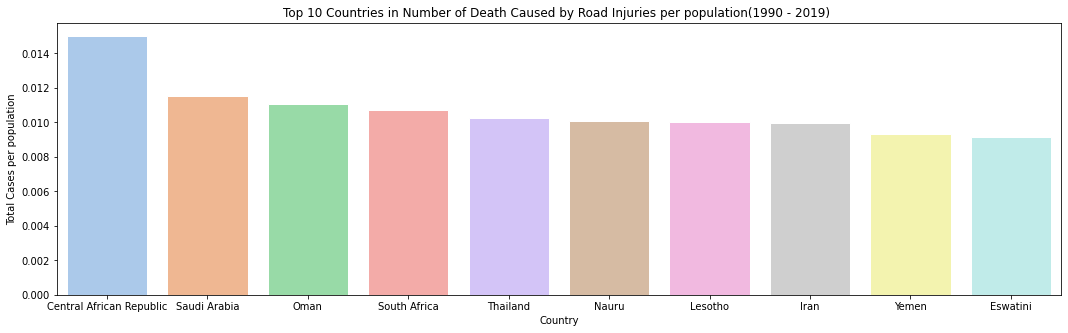

In [21]:
fig, (ax) = plt.subplots(figsize=(18,5))
sns.set_theme(style="whitegrid", palette="pastel")
sns.barplot(y=top10_road_injury["Road injuries by pop"],x=top10_road_injury["Entity"],ax=ax)
ax.set_xlabel("Country")
ax.set_ylabel("Total Cases per population")
ax.set_title("Top 10 Countries in Number of Death Caused by Road Injuries per population(1990 - 2019) ");

In [22]:
fig = px.scatter_geo(top10_road_injury,lat='latitude',lon='longitude', hover_data=["Entity", "Road injuries"], color = 'Road injuries',labels={'Entity':'Country'}, size='Road injuries')
fig.update_layout(title = "Tp 10 Countries in Number of Death Caused by Road Injuries(per population(1990 - 2019))", title_x=0.5)
fig.show()

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#C7F2F9;
            font-size:150%;
            font-family:Derby;
            letter-spacing:1px">
    <p style="padding: 10px;color:Black;"><b> Death Caused By Meningitis</b></p>
</div>



In [23]:
Image(url='https://static.vecteezy.com/system/resources/previews/006/583/028/original/diagram-showing-meningitis-in-human-brain-free-vector.jpg', width = 400, height = 300)

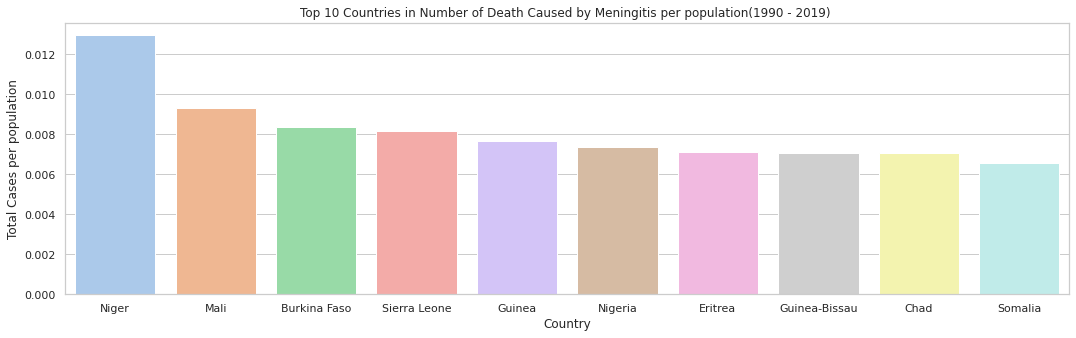

In [24]:
fig, (ax) = plt.subplots(figsize=(18,5))
sns.set_theme(style="whitegrid", palette="pastel")
sns.barplot(y=top10_Meningitis["Meningitis by pop"],x=top10_Meningitis["Entity"],ax=ax)
ax.set_xlabel("Country")
ax.set_ylabel("Total Cases per population")
ax.set_title("Top 10 Countries in Number of Death Caused by Meningitis per population(1990 - 2019) ");

In [25]:
fig = px.scatter_geo(top10_Meningitis,lat='latitude',lon='longitude', hover_data=["Entity", "Meningitis"], color = 'Meningitis',labels={'Entity':'Country'}, size='Meningitis')
fig.update_layout(title = "Tp 10 Countries in Number of Death Caused by Meningitis(per population (1990 - 2019))", title_x=0.5)
fig.show()

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#C7F2F9;
            font-size:150%;
            font-family:Derby;
            letter-spacing:1px">
    <p style="padding: 10px;color:Black;"><b> Death Caused By Alzheimer's disease and other dementias</b></p>
</div>


In [26]:
Image(url='https://www.jax.org/-/media/c09dc23a019e493dbfb9492aadf3da5d.jpg', width = 400, height = 300)

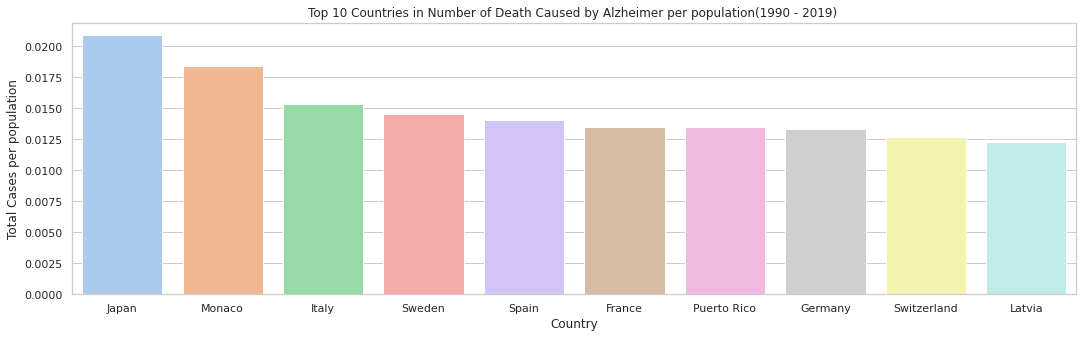

In [27]:
fig, (ax) = plt.subplots(figsize=(18,5))
sns.set_theme(style="whitegrid", palette="pastel")
sns.barplot(y=top10_Alzheimer["Alzheimer's disease and other dementias by pop"],x=top10_Alzheimer["Entity"],ax=ax)
ax.set_xlabel("Country")
ax.set_ylabel("Total Cases per population")
ax.set_title("Top 10 Countries in Number of Death Caused by Alzheimer per population(1990 - 2019) ");

In [28]:
fig = px.scatter_geo(top10_Alzheimer,lat='latitude',lon='longitude', hover_data=["Entity", "Alzheimer's disease and other dementias"], color = "Alzheimer's disease and other dementias",labels={'Entity':'Country'}, size="Alzheimer's disease and other dementias")
fig.update_layout(title = "Tp 10 Countries in Number of Death Caused by Alzheimer(per population (1990 - 2019))", title_x=0.5)
fig.show()

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#C7F2F9;
            font-size:150%;
            font-family:Derby;
            letter-spacing:1px">
    <p style="padding: 10px;color:Black;"><b> Death Caused By Parkinson's disease</b></p>
</div>


In [29]:
Image(url='https://post.healthline.com/wp-content/uploads/2020/09/11008-Parkinsons_Disease_1200x628-facebook-1200x628.jpg', width = 400, height = 300)

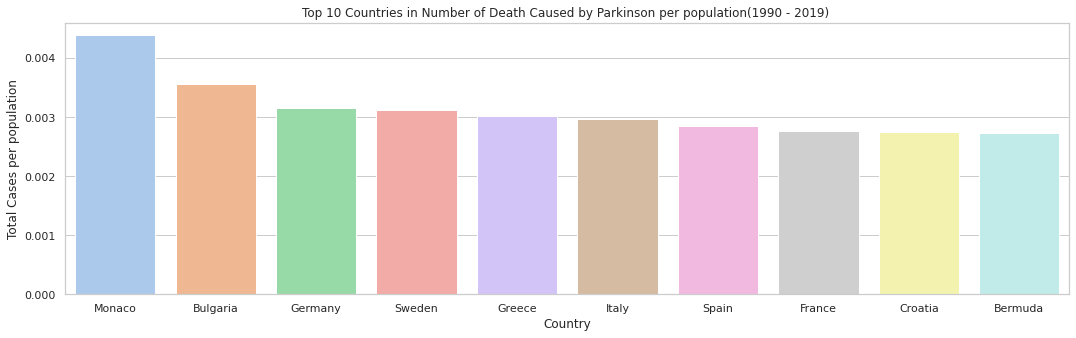

In [30]:
fig, (ax) = plt.subplots(figsize=(18,5))
sns.set_theme(style="whitegrid", palette="pastel")
sns.barplot(y=top10_Parkinson["Parkinson's disease by pop"],x=top10_Parkinson["Entity"],ax=ax)
ax.set_xlabel("Country")
ax.set_ylabel("Total Cases per population")
ax.set_title("Top 10 Countries in Number of Death Caused by Parkinson per population(1990 - 2019) ");

In [31]:
fig = px.scatter_geo(top10_Parkinson,lat='latitude',lon='longitude', hover_data=["Entity", "Parkinson's disease"], color = "Parkinson's disease",labels={'Entity':'Country'}, size="Parkinson's disease")
fig.update_layout(title = "Tp 10 Countries in Number of Death Caused by Parkinson's disease(per population (1990 - 2019))", title_x=0.5)
fig.show()

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#C7F2F9;
            font-size:150%;
            font-family:Derby;
            letter-spacing:1px">
    <p style="padding: 10px;color:Black;"><b> Death Caused By Drowning</b></p>
</div>


In [32]:
Image(url='https://gue.com/blog/wp-content/uploads/2021/07/2018_Drowning-8176-scaled.jpg', width = 400, height = 300)

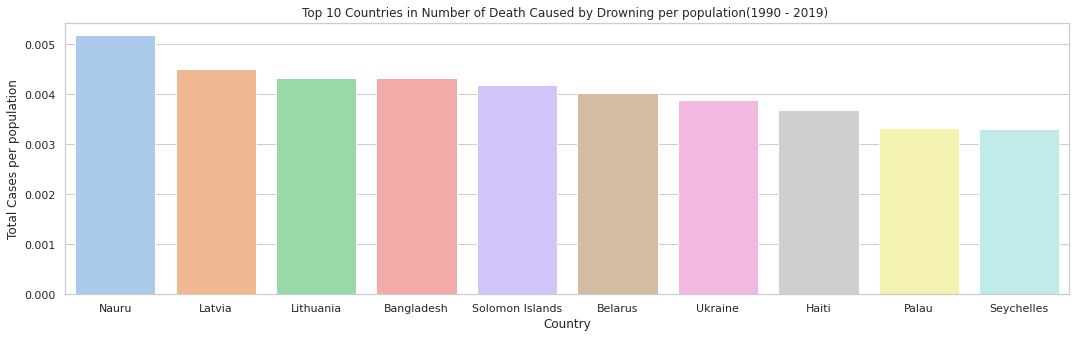

In [33]:
fig, (ax) = plt.subplots(figsize=(18,5))
sns.set_theme(style="whitegrid", palette="pastel")
sns.barplot(y=top10_Drowning["Drowning by pop"],x=top10_Drowning["Entity"],ax=ax)
ax.set_xlabel("Country")
ax.set_ylabel("Total Cases per population")
ax.set_title("Top 10 Countries in Number of Death Caused by Drowning per population(1990 - 2019) ");

In [34]:
fig = px.scatter_geo(top10_Drowning,lat='latitude',lon='longitude', hover_data=["Entity", "Drowning"], color = "Drowning",labels={'Entity':'Country'}, size="Drowning")
fig.update_layout(title = "Tp 10 Countries in Number of Death Caused by Drowning(per population (1990 - 2019))", title_x=0.5)
fig.show()

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#C7F2F9;
            font-size:150%;
            font-family:Derby;
            letter-spacing:1px">
    <p style="padding: 10px;color:Black;"><b> Death Caused By Drug use disorders</b></p>
</div>


In [35]:
Image(url='https://thedarjeelingchronicle.com/wp-content/uploads/2019/10/Drugs-777x437.jpg', width = 400, height = 300)

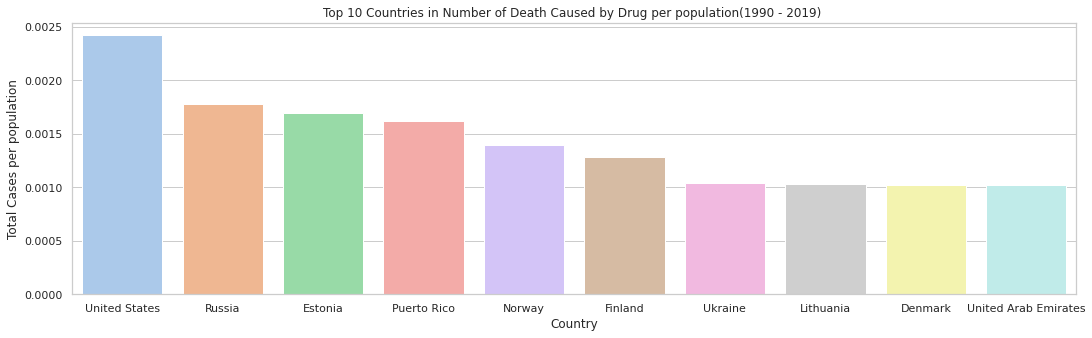

In [36]:
fig, (ax) = plt.subplots(figsize=(18,5))
sns.set_theme(style="whitegrid", palette="pastel")
sns.barplot(y=top10_Drug["Drug use disorders by pop"],x=top10_Drug["Entity"],ax=ax)
ax.set_xlabel("Country")
ax.set_ylabel("Total Cases per population")
ax.set_title("Top 10 Countries in Number of Death Caused by Drug per population(1990 - 2019) ");

In [37]:
fig = px.scatter_geo(top10_Drug,lat='latitude',lon='longitude', hover_data=["Entity", "Drug use disorders"], color = "Drug use disorders",labels={'Entity':'Country'}, size="Drug use disorders")
fig.update_layout(title = "Tp 10 Countries in Number of Death Caused by Drug(per population (1990 - 2019))", title_x=0.5)
fig.show()

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#C7F2F9;
            font-size:150%;
            font-family:Derby;
            letter-spacing:1px">
    <p style="padding: 10px;color:Black;"><b> Death Caused By Conflict and terrorism</b></p>
</div>


In [38]:
Image(url='https://st2.depositphotos.com/1026266/11927/i/450/depositphotos_119278754-stock-photo-portrait-of-a-heavily-armed.jpg', width = 400, height = 300)

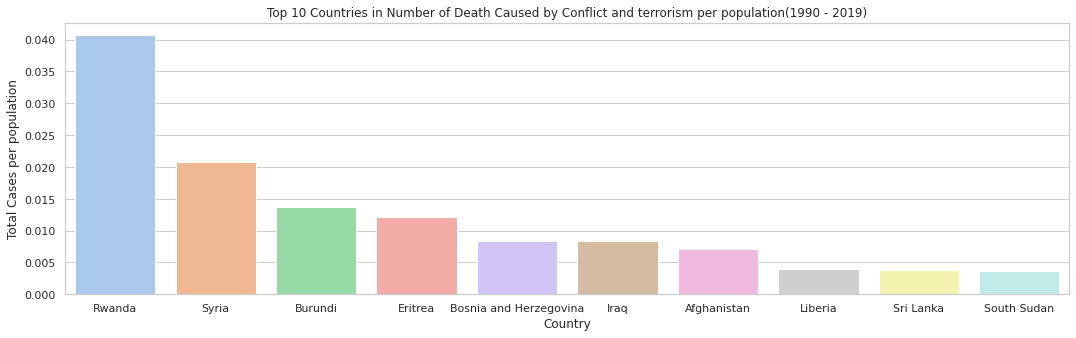

In [39]:
fig, (ax) = plt.subplots(figsize=(18,5))
sns.set_theme(style="whitegrid", palette="pastel")
sns.barplot(y=top10_Conflict_terrorism["Conflict and terrorism by pop"],x=top10_Conflict_terrorism["Entity"],ax=ax)
ax.set_xlabel("Country")
ax.set_ylabel("Total Cases per population")
ax.set_title("Top 10 Countries in Number of Death Caused by Conflict and terrorism per population(1990 - 2019)");

In [40]:
fig = px.scatter_geo(top10_Conflict_terrorism,lat='latitude',lon='longitude', hover_data=["Entity", "Conflict and terrorism"], color = "Conflict and terrorism",labels={'Entity':'Country'}, size="Conflict and terrorism")
fig.update_layout(title = "Tp 10 Countries in Number of Death Caused by Conflict and terrorism(per population (1990 - 2019))", title_x=0.5)
fig.show()

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#C7F2F9;
            font-size:150%;
            font-family:Derby;
            letter-spacing:1px">
    <p style="padding: 10px;color:Black;"><b> Death Caused By Diabetes mellitus</b></p>
</div>


In [41]:
Image(url='https://images.theconversation.com/files/152363/original/image-20170111-6450-fsm2zi.jpg?ixlib=rb-1.1.0&q=45&auto=format&w=1200&h=675.0&fit=crop', width = 400, height = 300)

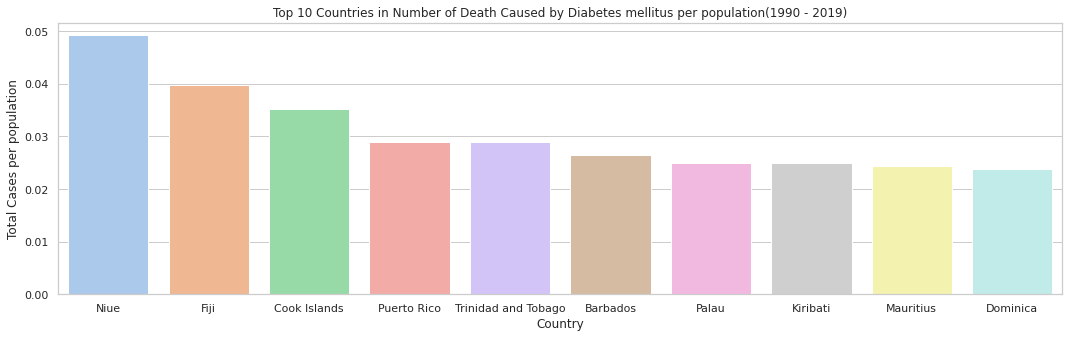

In [42]:
fig, (ax) = plt.subplots(figsize=(18,5))
sns.set_theme(style="whitegrid", palette="pastel")
sns.barplot(y=top10_Diabetes_mellitus["Diabetes mellitus by pop"],x=top10_Diabetes_mellitus["Entity"],ax=ax)
ax.set_xlabel("Country")
ax.set_ylabel("Total Cases per population")
ax.set_title("Top 10 Countries in Number of Death Caused by Diabetes mellitus per population(1990 - 2019)");

In [43]:
fig = px.scatter_geo(top10_Diabetes_mellitus,lat='latitude',lon='longitude', hover_data=["Entity", "Diabetes mellitus"], color = "Diabetes mellitus",labels={'Entity':'Country'}, size="Diabetes mellitus")
fig.update_layout(title = "Tp 10 Countries in Number of Death Caused by Diabetes mellitus(per population (1990 - 2019))", title_x=0.5)
fig.show()

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#C7F2F9;
            font-size:150%;
            font-family:Derby;
            letter-spacing:1px">
    <p style="padding: 10px;color:Black;"><b> Death Caused By Alcohol use disorders</b></p>
</div>


In [44]:
Image(url='https://www.usdtl.com/wp-content/uploads/Screen-Shot-2020-02-07-at-3.29.55-PM-768x460.png', width = 400, height = 300)

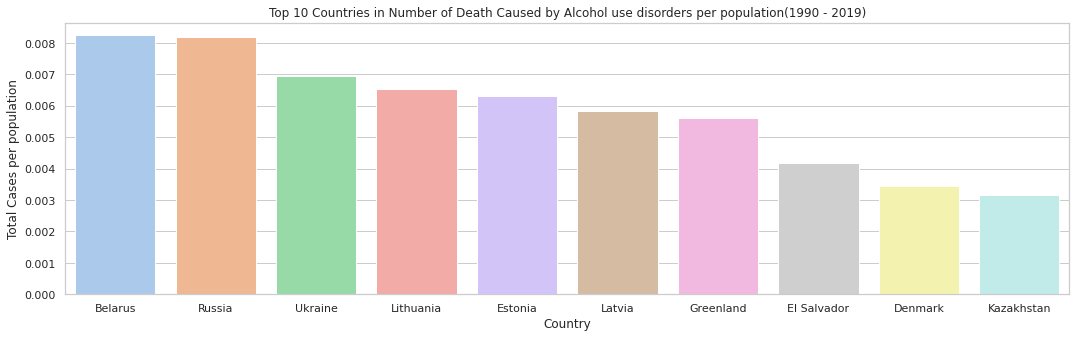

In [45]:
fig, (ax) = plt.subplots(figsize=(18,5))
sns.set_theme(style="whitegrid", palette="pastel")
sns.barplot(y=top10_Alcohol["Alcohol use disorders by pop"],x=top10_Alcohol["Entity"],ax=ax)
ax.set_xlabel("Country")
ax.set_ylabel("Total Cases per population")
ax.set_title("Top 10 Countries in Number of Death Caused by Alcohol use disorders per population(1990 - 2019)");

In [46]:
fig = px.scatter_geo(top10_Alcohol,lat='latitude',lon='longitude', hover_data=["Entity", "Alcohol use disorders"], color = "Alcohol use disorders",labels={'Entity':'Country'}, size="Alcohol use disorders")
fig.update_layout(title = "Tp 10 Countries in Number of Death Caused by Alcohol use disorders(per population (1990 - 2019))", title_x=0.5)
fig.show()

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#C7F2F9;
            font-size:150%;
            font-family:Derby;
            letter-spacing:1px">
    <p style="padding: 10px;color:Black;"><b> Death Caused By Chronic respiratory diseases</b></p>
</div>



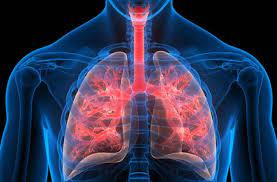

In [47]:
Image(url='data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxITEhUSExIVFhUWGBgYFxcWFRcYGBcYGhUWGBUYFRUZHSggGB0lHRUXIjEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGxAQGy0lHyUtLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIALYBFQMBIgACEQEDEQH/xAAbAAACAwEBAQAAAAAAAAAAAAAEBQADBgIBB//EAEEQAAEDAgIGBggEBQMFAQAAAAEAAhEDIQQxBRJBUWFxIoGRobHBBhMjMkJS0fBicqLhM4KSsvEUwtIVQ1NjcyT/xAAaAQACAwEBAAAAAAAAAAAAAAAEBQACAwEG/8QANhEAAgECAwMMAgAGAwEAAAAAAQIAAxEEEiExQVEFEyIyYXGBkbHB0fCh4SMkM0JS8QYUojT/2gAMAwEAAhEDEQA/APhyiiikkiiiikkiiiikkiiiikkiiiikkiiiikk9C2+DxZosoSLeqbrN3gye3IpNoPRGsRVrCKeYBzf1fLxTbTtbWdrcE0wlN6dM1dl7W+YtxbpVqCltAvf0t8/bd6Rw+oQ9hmm8SCMoOz73IamySDNipovSIaDTqDWpuzG0H5m8UfS0aWuDqZ9ZTN5Gzg4bDsW5OfVfEcP1Mk/hnI/geP7nOPwZBINsgDGZj/KW08G/WubdX1X0V+jA+hSeCCHAAGCYcLEGNxBCV0NDDWPTbbMarj5JRVxLBgpH57Z6nD8l0qiO+a2l9mg/XdEYwp1HO2DVgxsP+Ql3u327FudO6PDKNMbXnotggwBcntFuKybMG2n7XEH8tPa7nuCY0C9QZu/XcPGI8alOi2Qa6DvO/Z87J1gWikz19TM+43a47+XH9ks9IKjqmGa839qdY82mPBeaQxzqr9Z2ywAyaNwTLR7mGk+nUEsfn9RxC3/rA0lNhY+fE/dIvKmiRVYXNx5cB91mFK8TLSui3UT8zD7rxkee48EthJWRlNmFjHKurDMpuJFFFFWdkUUUUkkUUUUkkUUUUkkUUUUkkUUUUkkUUUUkkUUUUkkUUUUkkUUUUkkUV1Kk5xDWgknIC5TrDaGazpVnX+Rp/ucMuQWtOi9Q9EfEzqVVp9b9xTg8E+qYY2d5yA5uNgneGwFKjd0VH8R7Mch8XX2KytjIGq0BrRk1ogfvzQTqhKNSlTpa9Y/jygb1HqabB+fGHVMWXGSVxXdIQrHK4my05wte8qKYW1oOHQm2hMa9jxqk3zGw8x5pLUN0Xo5/TbzQ1Nyri0KdAyG8+yeiulGVKLmuZqlrpgXEO2zbaOOaPoswwdLQ6dghYX0ZrHXLA4kOkHYbAkEHZfxTvCSamqS/PfHfKFxz5a2oBv2T0nItLPhTlYi2m0/vdKvTHTEVdRjJLW6usYsTcgDbnvXzLGYlznFziSTvWk0pXLnuLnQ6JjITGQCyNV6PrMVRV+/bzzQVXqu4G3z+2nrDdHh8CEvoIl7rKUWIF5nWW5hFHGRLTBac2m4PMITFaHa/pUTB+Rx/tcfA9qqc5dU6xCuStQWcX7d48ZkAyG6G3vFFei5hLXAgjMEQexUrVf6hlQatVocNhycPyu2JdjNCOALqR9Y3d8Y5t28whKmFYapqPz5QlMSpNn0P484mUXpC8QsJkUUUUkkUUUUkkUUUUkkUUUUkkUUUUkkUUUUkkUUTDBaKrVbspkj5jZv9RsuqpY2UXMqzqouxsO2L0z0bop9XpHo09rz4N+Ypth9B06XSquFR3yNnVH5jm7kIVmLxBdwAsABYDcAjqeDI1q+W/wAeEDfF30pefxx9O+ch7KTdWkI3uN3O5nYOAsgqlQlevCrc1EM2lhsmSjW52zklcEqz1ROQVZYsDebKBPWlXschw1F0cM4525/TNcW52S5tvg1YK7RziHgjPZ4K52EB+Y8gAO0q6ng26shpkbQ8E9yoKbZ7zTnFy2mx9FKxLwHASdfLZDDn3ppo1nthz59yU+iZaHsgC+ub5yGOH17U8wIAqjmEHync1Vvwnqf+OADC1bcT6CY7S9d0y1toMjbaRksjUzWr001rtlzboncRt6+5JsRg22AaZ3h7fApliVZjPKUWVIDRC7qFENwtsyOY8xKor0XDMW3i4VArKuyVLAtKCvA5e6qjaZXBecYCdtKvo1y0yCqNQhdALZSRMmAMMxGHpV/e6FT5wLH84GfMX5pFjcC+k6HiNxFw4b2namzUfRrAt1KjQ5h2HxB2HiFKlBavY3H5lUrNS02jh8THqLSYr0cm9B4P4HkB3IOyPck2LwVSkYqMc3mLdRyKBqYepT6w8d3nDKdenU6p14b/ACgiiiixm0iiiikkiiiikkiiiikkicaL0JUqjXPQp/M7b+UbfBGaB0OCBWqtlvwM+c7yPl4beSf1oI1qhG4NGQjZAz5CwTHDYLMM9TZw4+O6L8TjcpyU9u8/HE9uwQLC4OjS/h09c/PUg9k2HUrK2JcfeqDvKrxVRjjMho4t8IQbsPTJ9+qfy0yfEphmyDKgFuzSAhM3Se5PbqZc7U/8n6T9VUWs+Y9n7r1+Fa3/ALdUjeSBKEGJpm3qndVT9lkz2PSt/wCvibKhbq3PlCTQbseOsEeEr1mCJ2tPI/WF5Tcz5Hf1g/7UWGsAmXDsPguqqnWcZiNJS6jq5ghVPpg80UHH4Xg8J8kTh6G17GzxEdsZqxTNoJUNl1Mr0TozWbr5zluH7pi/Qr3CKIDnk3k2aPmJyHMq7DNNy4EM2Gbm3wNiGjiUZ/1L4WgsbuAHaTtXGqUlQoNs1p0aruHbqxQ70YaP42IBdtFMawH87yPBUYj0Y6LqlGqHhglzXDVcB8wIJBjblvTCriR8x/pCN0VjABUtILHNOQ95pGzmlRUXuTHA2WAlforhXNezWvZ5n+VwjjknuAb7Uc9iW+ilcPeyZmH9mq7suVoMFh4qAmYnih+UqV6i5Nlo/wD+P1cuGqB9Dc+k+f6awTzcWEm3XM2XOB9GG+rFWu4w73W0yASN7nOBgHdCN0zigOjeLzskzu6kc/STX0WiIhjYiPhaAdnBH4hUvode+eaoFtcw4xfT0DQP8Oq+k7/2FtRh56oB8VdX0EWROrJ3Olp3wSBIVFLFgfEf6QPNMKWkoEOBc05ggQf3W2GYU9WNxB8VTNW2TQ90y+ktHim4bNbZ9OCpYxoWlxVMGXNbLDscZg7iNnMJTVoubdrQBykjrRGVT002QMlx0H2iCHClwsLb8u8ql2DjNzR1k/2govWHxP8ANSq1gE9I9gXSinWUDEG0F9S35+xv1K9DWfP+n91XUewfA4/zj/iq2YimSAKTr/ik+CyzqOH5muViL6/iHMLR/wB39J+qKpYp8RrMcNxyPUbIAYJpEltZo4arp5XXjKNMfG4fmYR4Stw7L/v2MwKK3+viWYrRFCpkDRfwvTJ4t2dSz2kdGVKJh4scnC7Xcj5ZrU0KtMCHGZ3NMeRRLqbS0tj1lJ1y03I4jlvzCxq4RKouuh7Pce4mlPFVKJsbkdvsfYz58om2mtFGi4Fp1qbvdd/tPEd6UpM6MjFWGojZHV1DLsMiiiirLyJx6P6OFapLv4bBrP47m9Z7pSdbjRlEUaFNnxVIqO5u90dQjvReDoipU6Wwan2guMrGmll6x0Hufu+0KqYmJJ6OwDc3YGjYlmIxlNxhwd1OjuAjuQ+JqHpFLaj5TGvX3QGjQEaPYRdj+haTtE7wFV6xodE3HA7M9yo0bVOsAcjY8jmvMRRLXvne4d5WOa6hlE3CgHKTGGHxwB1i8kZ6paOwHYuBUYSSKQv8pM9mSXsaArGvU50ka/PrK80ATaHNqMzv2D6rypVlUtqTndE4KgKlRrIsc88gCT4K+ct0ROBAuphGCwUw986pNgM3DyHFbPA4INHrHtsRLGnbuc4HZuCF0Jo8PfrOgNZBcI2bKY3TAngCNqY4rEGo+TJEnqXK+IGH/hqNu0zbB4Q4rpt4D79MCxbpMw3lAXlNtPU1nAZwN/EHZHFX1sPYwJ2r2vRsBmAIjdGRQTVCw0MdJhchOm6APw7TNt0DfI2qYZgAMasF2rltAnzRNWidQbCIEzBtkum4JwpU/wAXSkm9zYnsCola5sQJethebW4vrrBdBVAHBo/EJHAHMptQqnWzOaWaOwmrWuDm8xzBz3JhSI1lli2bOvdGHJFNTRfvmf0mWufBAmTn4mF3o2kCNgANrZg5xP3dd43R59YTsBdPbbx7l5hMOda8wjalQ5bm0QrS6el987q6PDXOtYTe+wwmLW0wNTVBeN+UxKZ6W0fq1LGQWw5utI1htytIAtzS2nQOsTkdpWAqlz2Q7/rCmuguTp985RhamqcmkbbDvXOltHAsc8NJpkRbNrjkN3JHuwvScSM933v8UZh6gadXNjhBbsI4/fFELygKZtt4/eMDqckM65tnD7wnzfF4Y04My05HyI2HgqqdcCxuCtbprROq5zBdj/dPHYec7vNY47iL9aKcZCCuwxOvTurbROy9m5x4QPGV5RxDGO1jSAmbzJEiMv8ACpfUP+EO4rPnNQfYS3NgixhrsVeNfWnIaoAHUqKVQX1XRAk5/RCuG5EaOokOc7YGE33yI74XAzs1p0qqgmEhkCapvuaRPWdiKwmObkNYcZmON/KEgrVSSrKNWCFEr2OgnGo3Gs1L2tqA03iWPFyPhfeHDd3LD4/CupVHU3ZtMcCNhHAiD1rTYJ8O4RJ5RKo9J6GvSp1xm32b+WbCewjrCtjKYq0842j0/V7zPCPzVXIdjev72eUyyiiiTxvC9HYf1lWmz5nNB5E37lqtL15qEjYbdSSeibJxLD8oe7sY6EfjHS4800wgtRLcT6D9xbiulXA4D1PwJziXDpbjB7cvFLHRvRtcywHhHYf8JawSVWs2ol6Q0MNogAaxyHedgCrZjnOcdcyHH+mTs4cFxjXXDdjR3m5+nUhgFk7kGwmioLXMPc2CQV2Gr0EPAdtFnc9h6100LYATM9stoUi4hozKfYCkGEwPhtvJJCB0RRs55/KOQgvPZbtT70MwbsRXfiKnRp0QSN2s4EMaN8Xd1BbCotFQ52nZKc21d+bXZ7xo9/qmBgzzdxJz+nUh6VbVIOvY7Im31V9XClzjt2zsjeq6NC8ahcN37oGuecvc6x1hQaJBUafE6dVdLXB0tnZBi+2U0o4Z9QNeBDSDrbhy7+5W4bC0g0WJBBlouQeB2CEypVdWi1jWkauU53MmTxMpXmym09EqO1jbQ9uw/Fvpmax+Glhtx7xZX4imQGMy1WNbwMNAlMcQ8tklovmCBcrnGNEiM4ETyVxWU6GcqYNmIYb4HiMLqkVXZubH6QDP3tQLH9JMfV9A68i8ty/mPLLsS04yiDEk8QPCy66VKhBHCbUauHwqFSbXJh9TBNeyZ1C4yTsOz6oKlo8h4lwMEXByHCUTXqsdqlroaQNXWMRvBOUye9W0qMQfeG8XHUrVGakelMKdChiNaffD8RSLiwyIMa0nhmN+a5rYF1vV3bPSIuYibeCI9WHU9pgSBabDZfcCiqNR1N2wAAWNo3HdKyNQmW5tUFht4GZnE1nOfDbapI4WcbnrK5dibe9lwzPPgnVZrDrdANLnTYyDe+21py3pFi6F7NtsPBb0EBbMd2yBYx3CEbSdpv6fM7pVBVb6s5/CdztiymksCS59ocHO64J6JWpwuDcCHQYz4FU+lmGLajKo92t0XfhrAS1w5gX/ACkptSrrcUm3/ieaxOFcA1V3fkbZ8/cFS5qZ6Uo6r5As7pAbt47Z7QgHt2LjLYkHdMAwIBEopjMnICT9Aq6GkHSQSQ0iCBkOpWYo6rdUZm54DYEvLVi7FSLTRVBGsNr04Pmq6WqCuqJlhHy5cj+/ihqeahbUECcy6ER21/vHgAOuPIFGUWesoVqe+mXDmzpDvCXPNgN5J8APNMtAu9oBvsmFLpNlO/TzEAr9FMw3a+RmJUVlZmq4t3EjsK9SER3G/oh/HP8A83+CKxWZQfoo6MQ0b2vH6CfJG4sXKa4c/wAv4n0EV1x/MnuHqYMT0DwPkPohMK2XgcUWPcdzHgUNgh0xz81m3WWbLsaVvOs4neT4rr1a4w+aO9UqIuYXlnaxtKaLtUz2jeEU60EZFUOar8G0uPq/mNuauunRnCL6x9o+1Jp2X6+kZWzwNIUME1s3f7R0fis3lDQ0c5WVwNIOLKY2mw/APed3T1laWdd2qcjYfRXxvUCDdNOTku7Md+kN0YdZpLibEBoznae5W1ZaYDZbIk/QDzXOo2mIbJeJAAE3PxeFlWzXDQYh2R15E/f1SU1TtOyeupURbKNvZvg9VlTWkEhucTHUutHU6jHio4CL21t9spvmjGbNcDMScm9Q2phUwzXgFh1uQNhcSd3WuGpcaTTmERrtBqtfoBuqDq2EzwjuCExdfKWjLeusS7oghwdORBBHcqNM0HNY3ZIE9k+YWQGY2hTOKVPMPCL9J4kPaA2wyIPGYKzfq3T7w7UfjnFrReZnu/ykr6/TNhnuTinkCgTyeIqVHYsTvjHGVA0NFyQLxlcCEw0LpUsaQALnbJ2BI8W+Wh2teLjlaURhmuDWxFxPbfascQFzETTDVHCg3m+wWNDmh4aJyOcdivxFYnLKIO8TmPvgs16P4p06h25XWlo09cRMG8ZZjZO45IA9FtI+pOHp5jF9TAvABa4zebETlusimNc0CW7LnInju27US6s40ujqggwQc7GCJ2RBQZJNnExsBMkZdo4Zq7VrbJEw4O+3vCqpGqQCW9GRG05kdxQFV/raD2Hpa0as/OLg8DbvRGGpOg63uky1wIOVoI2WQVSlDpblu371thCc9z3xfyimZLDutMLpvJh/N/tScnVGseocVrfSrAQ8six6beZGsR2EjqWMrPk8NibV26WYb9k8tSXo5OF7+cHcJuuHU0UGL2pTssQk0LWg2F94je0/XyVNMdJW4Y+0H839pVbfeWe4d8tv8Iwq5t/L5lMtC/xG80sq+91DwTTQLfat5phh/wCr4wDEaUj3TK4/+LU/O7+4qKrEvlzjvcT2lRI21JMbqLACMfRk/wD6qX5o7QQmeP8AePMoH0VpTX19lNrnnnGqO93cr8W+STvTPDaUO8n0EX19cR3Ae5lQPQdzHgfqh8Gekrne51nwCGwxz5HwKoTqJqBoZxhitBh8NrN4xP1WcwxyWwwVhTf8J6J++tbYEBr3mONJXZEtViI0YzpOd8rTHMw3zKu0rQ1XkL3Q7ZLxwB6gb+Ktzdq1u2QVL0s3ZNN6G4fWxFescqVP1YnIF0D+1r/6k4bRuCDY5fupoRoZhXO/8lQk/wArQ0d4cetEYB+sDFgCOZzS7EOUqNfjH3J1EOi222lwrmxds3cN6A0hpTWNnOn5iAewD3VfjqcXk8tk/e9KmOk+5JzFs+W9CFVbpRyXan0AbfeO6MNFUn+9rSDcgz0uo5jn3plXxgiA5jRzI2XB1TBFkpILwW6jhxg7t/b2IDB4CoKklphpBmLHd9epY5Qb3mmYgAKAb8fiP/VARdgGyPoqtM6SY6kyOJ4H4fJA6XqljQTAJBDQSB1oLD0C/DtcXCAXCwJyM+atSQDUjzMzx2IuAg3cBAsc9rg0322HPilVSi0umXXA2dXkitKt1S0CYib8yk1aoZFzlv4lMwy3Gm6eccMQdYwxDWtazMmTwtYQjqjmgwDaIE7hZKaBDnUmmZL7HZsJkIx9EmQHNO3aPFVxBVm2DZO4Yso37Y00NUio0yO1aahiwIJO21pWBoBwII8QVoaDS8ZHsyKX1KQvePcFiGyFBaafE0tcCq12QdabFxAgmbiYSfEWcXCwyO8EwctqM0dQe1jxqky0mIOYy++KWmo6CXMiTy8V1KdzebVKtlts9obSxZqWyvNtp+qMNCYMgGYCWYWoHHVlwdy+/JOHkgEzkJ4HYbd60NSxsv8AqZikHQs2vv3xN6aUz7KqNrYJ403gjtFU/wBK+dYmjqvc0ZAkDlNu5fT9PHXwkbnB3IHo/VfOdID2rufgACmdNf4C9/zPL4g2xD236+kqwtDWIC90jS1RHV9Uz0PSADnnIBB6XBFME5uk9U/sjObC0b74t5y9bLENF3tB97CufiXFJ3tG816T0ktBuPH4jAj0jCsekOQTfQTulO5pPcUmrZt5eZTPQlUCo2cjYo/Dn+J4wHELembcJj1ETjKBpVHs+VxHYVEmtbQxsCCLiPtA09TDPftqO1ByaPqT2IasUzqDUoUWfgBPN3SPilNUpuwyU1XgPydTFadN2fiT5DQek5rHoDr++5C0jZ3I+CvxJ6A5eZQ9P3HckG56XhC0GnjK8NmvoPok0Poua4SAQYPI/RYDDBbz0Hdd7d4ny80Xybo/hAeVv6JPCxlWnqMgOCF0PTi/zSOofv4JpijIgpbi6RbTLRmQ1o5vJd+yProA/OQbDuTTFPjNZRtSYzLojtN/NH4GlDS120i1+Hmq9MUQx8DIQOUWVTNIQRadnHO/NIcTT5zpCev5PqrSOVu76N8Z14OQyzk+CAFLVl9MjhnAnPL3TEhL8ZT1zLSQDsI+iv0fS1BJdlNgPrz7TwS00isfLXztYrpx+iX4b17nAlxbGxhBPMuMgBO6OI9nBdq3yaLde/NZ2ppJosJP4RE9aFpaVJqWyORGzeCswrHbNaj0lFgbnz/X4jf0k0Z69odTjoDfnJuL5GR3lIsDiBTw5ZEkVHchZv0RRx1+Iyvsytw4Jfh6D6jahiBrz1kIila1rRTjQc2YGKtJYjWdeMhsS6pVbIuzL5XHeiNIMio5u4xPJJHVJcTs8kwz2ItERFwbx1ha4DmGAelxHwnijmPaTYxY2PIpPo7pPY3aTbuRGJY5uzr4Ktchjs3TuHuo0O+XbU/0E4tkk9GO0/skOBadvu8U3qYgaoAFtzfP73oJwDoI3w5KHOZ9F0LpNhAgG48Nn3vSrGkVQWgwQQdxGyw3xOWaR6D0iGa062RgCJmDCZYXGNJkknb1jf1eKwKsDpGtFqbgknUjUSzB4drTAgkZiYPXtngi6lNpJIsSMzsFv2SF9A693SNlr/ujamILQGAW8/NEU8PmIJMwqYzKpGW1tnCdU2azKjPwmB+Vs+S+fY+nL9b5s+cwfLtX0zRgBceII5SD9VhPVhwDzvB/qYD5J3hxzgKcLGeQxpyOH3EERhojDN1WtcJDjcJL6Zu9oGjINA7loNGGXt5+AKy/pY+az+BjssmGKsKFhEeFu2LueBP5mXB6beY8V1U95cVc+tW4n3utef3GehO7uhrzZvWPvtRGFdBCDPut5nwCuouRqHpQRx0Z76Vgio2oMqjAetvRPcB2rxaCho1mIpt1vgmOuP8Aiou1+TXq1DUXYdZShyilKmKbbRpA9OVZeYyFhy2JLUKNx75cUBUXcQ12MmHWygTnGmw5DwVDf4Z6vH9l3pE3XJ9wcT5IN+se6GJ1R3yUAtl6EvisBvBHn5LH4cLTejNTVr0z+Id9kZgtHEC5QXNRYdh9Iy0g6C8bi7xRejKQqvo8HUD+oNPig9OCKjxxPiifRJ5D6R+Wp+mQfE96ZVDdip4H0i+j1EYcR+ZofSKofWHehBRIbYHW27hab9iN0jDqmugMdUFMHpE6+y9gMpXnamZdJ7HClCC58+EEq1SOiHS7w6l7i3uY3OYAPEyJLr5xI7V5ojAPqy5h1W5Oe7ICRZo+LbluTJ+AwrLuHrXfNUMjqYLAdqGa5bZC1qALt/XzMXXxbZMkg84G+eCpoaQIIFom8nMbbrdf66iLCnTEZRTZ9EDidK0IM0aRP/zYT4KC53TA1N95nsPpTpANtcAaolzhuEXJO7mtFQr+rZqR7QmXXkA3nKxIkDqKWu0n8lNlMHa0apPMjwQul9Ieqpbn1B0bXDdr42bhvM7l0ILyr4hssX6WxNzYy4kmDESSYSRlYTk7+v8AZF0tZzSXEAEECSM5++1B0qXSzHamDA6WigMDe8bYGvDmOA+LbfYTmrsRU1jrAnYl1XEOY5rplsyL2jcY6wi9ekbtqtAzh3Rc3nsPMWKzxFi2s1wxIGkKbiYAyJvMjsV7cQI3TxQ1Cph/iqtP5THanGDfQP8ADNI/qP6pIQhUw9Ksos2i+oXQOiD1uCs0Ri9d0NNrSTs3X7oTnDaTe0FrSwg5gBpHYFbSr0XmKtCmfxBga7+psFV14TZHAI1nGIeWkFxiQN/RsEXQcbn3m/NtGf0zVlTRlN7YpvcJjovdrDO3SzEX3oTBtLHGi+WnIzxuMswYF1opYjSas6g9/rw8Y50BT9sBxWJx8MApjY5o7GlbjRjxTeI5d9o4ZL57pZ3tAOZPMuM+ATjBgqhJ32E81ynY1VXdqfvdHOgbv5A+Cx+mn61R53uJ71rNCOgVHbqbvBY3HG5ReLP8MRVgh/MOe4e8S1wrMXnK8rheYj3WngEjO+PhuhTT0OseatplU4c9A/e0LumUSpg7CP8ARdeGlRAYV9lEyp1rKBFtSiCxMGxLrob4hzVuIN1UzOdwS5zcxigsINjDLl7VyaOZ++xVVTLldWFxyCFJvmMI2ASzDp7oQe0ZzCSUAnugR7Rp3X7EfhB0hAcUbIx7I508Q4ioMnAO7b+a99FD7aiPmeW9pYhdHVvW4Km7a0uYeomO4hEei7ors/BUa7t6J8kcx5wBx/cv5tAaIFMFD/a1vAGaDSzyxx1cvvNKKLjWJL/dBvvO4BNNM0HVK+o0xvdsa3a4/edkHpnFUabQG9BmwknXfvMDfwSp6tzlI1j5EIF76TrH6fLQGDVaAIDQIgcgkOK0ttPf9LlKMbpK/RbG6TJ5nd1dqWvxB4dn1WZCid5xj/uN6+mdzSeZgdyG/wCs1PlpgflcT3uS/XJC5dFlkVBlhUMYt01VmQGD8RYHHqDpCEq13VHFz3FxObib/fBCOdOVgFy6uchl39q4Mq7pxizRu/EWaA1kAWloJ4knmCqmYm56Lbx8I2qz1Q1G61RreiLQXOvfIfVUinTn+K7rpGP7kYxbT5AgahdfgyytV1mQQBexAjZee5AOAncdh8ijMeyKYLXh0OzbORBzBFku9bNieR+qxqnWxm1IaXE6I325LtsjauGu2FWDKyytNb7ofQx7/iOsON+wp3gdMOymRudeORzWYdUINuCsZiSN33yWgI3yt23TeYTS7j7p6tqKrY+pUMzdjdwnVm4757VktHY1pgOsdhyHI7jxWy0Limsd02AzadsbQRtVsypr7Swu4tf1jPQALngu2XjlvWDxTpc079Y9ryt5oqmKIrXkNBLTvBBIM8u9YWs32mqPhAb5nvKPw5Lrm3G0XYuyuF3gG8b4E6tF294LB/SXHuaVj8XmVpNI1tWphKPzGo49dM02+JWexguea2xLBrgf2m34BgeDWxLf5a+RI9oorhcvvTHCR5+asrhcNHQPNJ2GpjlTpLMCbEcCrKZQ+BddXtsSrobqJV9phlA2UXNF1l4i1OkDYayrEG6rabH7+81FEO3WhKdWBt95XVPe7PAKKIddnjN2hFAJ1gzq06rxmKb/AO0jzUUTDD+x9IvxOyWehVSaFdnyua8fzAg/2BG4A6tWRuj9TVFEThP/AJ6f3jBMSB/2Ko+9UGOdK6eAJDWGXEyTFr7Bt61kcZTLnEueXHKSOzblwUUVXpra9tYQlRjZSdIA7DyZLu791WaLeJ5qKIMqISjsZXUOxDvK8UQzwhZzVMADrXFJmsY5+CiiyO2ajZHtSuAY1GGwuZk2BvBVbMbf+HT7D9VFEe1VgdDAhSUieYh/rKbhqtaejcTv4ngkcXUUQ2INyCeEJoiwIEvFx3LumVFFms60JZey7p0WnKR3qKIlADtmDEjZLaVGDE2Odv3T/RGMdTs46zcgNo5HyUURVKkjGxEweq66gx8/TQdTLWtItedzSCQL7bJHhmzVcTtqH+4qKI+moAUDjF1RiWYnhFnpLiD/AK+l+D1I/Vrf7lNMMh7hxKiiXgkmrf8AyhaABaNv8PiJqwVTMndXmvFEE3Wh67JXQMORdTPmoouJ1fGWfrS6kbKKKIhdkGO2f//Z', width = 400, height = 300)

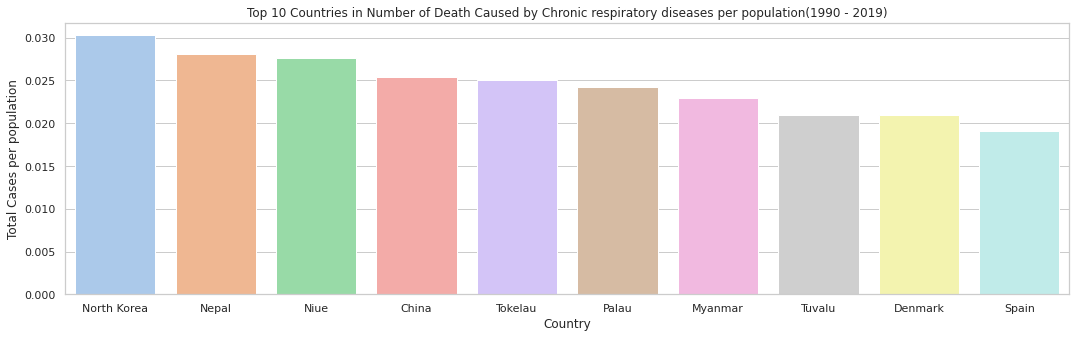

In [48]:
fig, (ax) = plt.subplots(figsize=(18,5))
sns.set_theme(style="whitegrid", palette="pastel")
sns.barplot(y=top10_respiratory["Chronic respiratory diseases by pop"],x=top10_respiratory["Entity"],ax=ax)
ax.set_xlabel("Country")
ax.set_ylabel("Total Cases per population")
ax.set_title("Top 10 Countries in Number of Death Caused by Chronic respiratory diseases per population(1990 - 2019)");

In [49]:
fig = px.scatter_geo(top10_respiratory,lat='latitude',lon='longitude', hover_data=["Entity", "Chronic respiratory diseases"], color = "Chronic respiratory diseases",labels={'Entity':'Country'}, size="Chronic respiratory diseases")
fig.update_layout(title = "Tp 10 Countries in Number of Death Caused by Chronic respiratory diseases(per population (1990 - 2019))", title_x=0.5)
fig.show()

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#C7F2F9;
            font-size:150%;
            font-family:Derby;
            letter-spacing:1px">
    <p style="padding: 10px;color:Black;"><b> Death Caused By Maternal disorders</b></p>
</div>


In [50]:
Image(url='https://www.biomerieuxconnection.com/wp-content/uploads/2020/02/sick-baby.jpg', width = 400, height = 300)

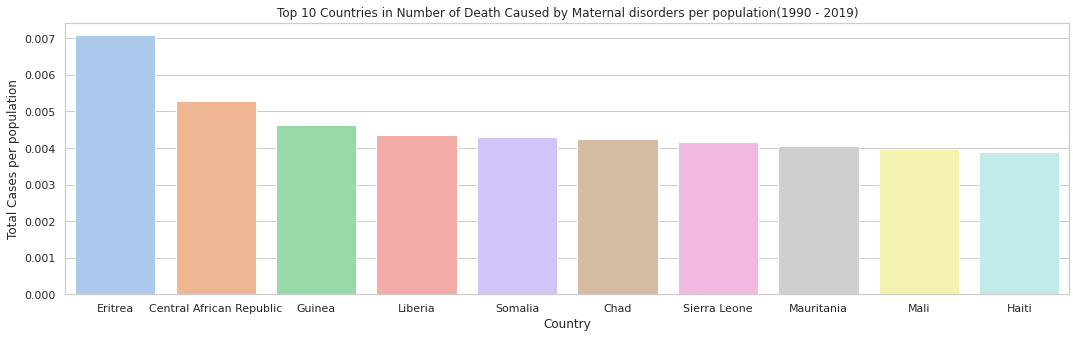

In [51]:
fig, (ax) = plt.subplots(figsize=(18,5))
sns.set_theme(style="whitegrid", palette="pastel")
sns.barplot(y=top10_Maternal_disorders["Maternal disorders by pop"],x=top10_Maternal_disorders["Entity"],ax=ax)
ax.set_xlabel("Country")
ax.set_ylabel("Total Cases per population")
ax.set_title("Top 10 Countries in Number of Death Caused by Maternal disorders per population(1990 - 2019)");

In [52]:
fig = px.scatter_geo(top10_Maternal_disorders,lat='latitude',lon='longitude', hover_data=["Entity", "Maternal disorders"], color = "Maternal disorders",labels={'Entity':'Country'}, size="Maternal disorders")
fig.update_layout(title = "Tp 10 Countries in Number of Death Caused by Maternal disorders(per population (1990 - 2019))", title_x=0.5)
fig.show()

## Let's see the relation between protein deficiency and maternal desiese.

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#C7F2F9;
            font-size:150%;
            font-family:Derby;
            letter-spacing:1px">
    <p style="padding: 10px;color:Black;"><b> Death Caused By Protein-energy malnutrition</b></p>
</div>

In [53]:
Image(url='https://c.ndtvimg.com/2018-11/sqf3auh8_proteins_625x300_27_November_18.jpg', width = 400, height = 300)

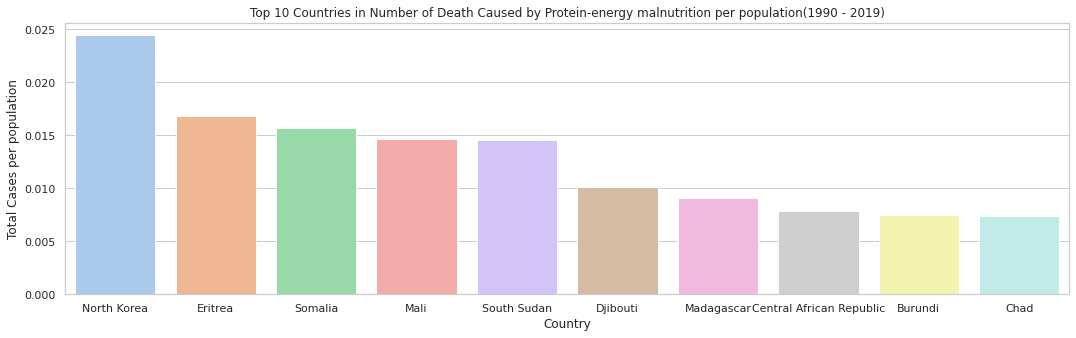

In [54]:
fig, (ax) = plt.subplots(figsize=(18,5))
sns.set_theme(style="whitegrid", palette="pastel")
sns.barplot(y=top10_Protein_energy_malnutritions["Protein-energy malnutrition by pop"],x=top10_Protein_energy_malnutritions["Entity"],ax=ax)
ax.set_xlabel("Country")
ax.set_ylabel("Total Cases per population")
ax.set_title("Top 10 Countries in Number of Death Caused by Protein-energy malnutrition per population(1990 - 2019)");

In [55]:
fig = px.scatter_geo(top10_Protein_energy_malnutritions,lat='latitude',lon='longitude', hover_data=["Entity", "Protein-energy malnutrition"], color = "Protein-energy malnutrition",labels={'Entity':'Country'}, size="Protein-energy malnutrition")
fig.update_layout(title = "Tp 10 Countries in Number of Death Caused by Protein-energy malnutrition(per population (1990 - 2019))", title_x=0.5)
fig.show()